In [253]:


from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)



Toggle code

In [41]:
%reset
#pylab qt -> open windows, needs display
%pylab qt 
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
pwd

'C:\\Users\\kovor\\Documents\\python\\pyXTel\\pySurf\\readers'

In [3]:
%qtconsole

In [42]:
import unittest
from unittest import TestCase
import os
from format_reader import read_sur
import numpy as np
from pySurf.data2D import plot_data

from dataIO.fn_add_subfix import fn_add_subfix

# location of test input and output data,
#  for economy during development, hard coded path.
testfolder=r'..\test' 

#paths relative to testfolder
sur_prof_01=r'input_data\profilometer\04_test_directions\08_xysurf_mm_Intensity.sur'
fits_WFS_01=r'input_data\fits\180206_C1S06_GentexCut_Meas1.fits'

outfolder='results'

In [43]:
def test_reader(file,reader,outfolder=None):
    """called without `raw` flag, return data,x,y"""
    import os
    import matplotlib.pyplot as plt
    from  pySurf.data2D import plot_data
    
    res,header=reader(file)
    print("returned values",[r.shape for r in res],header)
    
    plot_data(res[0],res[1],res[2])
    if outfolder is not None:
        if outfolder == "" : 
            display(plt.gcf()) 
        else: 
            outname=os.path.join(testfolder,outfolder,os.path.basename(file))
            os.makedirs(os.path.dirname(outname),exist_ok=True)
            plt.savefig(fn_add_subfix(outname,'','.png'))
    return res,header



In [44]:
def read_sur(file):
    from read_sur_files import readsur
    """read a sur file using read_sur_files, that is expected to return a structure
     res.points, .xAxis, .yAxis"""

    res = readsur(file) #in readsur the default is False.
    data,x,y = res.points,res.xAxis,res.yAxis
    del res.points
    del res.xAxis
    del res.yAxis

    return (data,x,y),res #stripped of all data information

def test_read_sur(file,outfolder=None):
    """called without `raw` flag, return data,x,y"""
    import os
    import matplotlib.pyplot as plt
    from  pySurf.data2D import plot_data
    
    df=os.path.join(testfolder,file)
    res,header=read_sur(df)
    print("returned values",[r.shape for r in res],header)
    
    plot_data(res[0],res[1],res[2])
    if outfolder is not None:
        if outfolder == "" : 
            display(plt.gcf()) 
        else: 
            outname=os.path.join(testfolder,outfolder,os.path.basename(df))
            os.makedirs(os.path.dirname(outname))
            plt.savefig(fn_add_subfix(outname,'','.png'))
    return res,header

returned values [(51, 112), (112, 1), (51, 1)] <read_sur_files.Res object at 0x0000011891C55EB8>


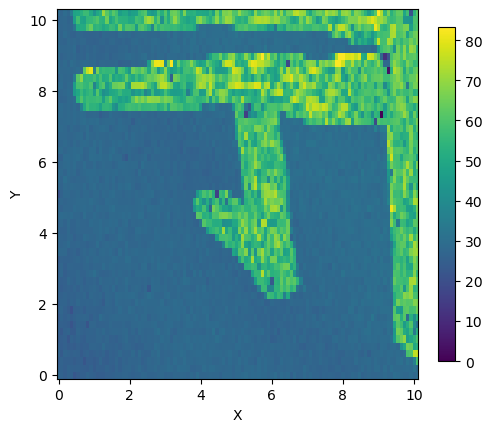

In [45]:

plt.clf()
df=os.path.join(testfolder,sur_prof_01)
test_reader(df,read_sur,outfolder=os.path.join(outfolder,'test_read_sur'));
display(plt.gcf())

In [51]:
from astropy.io import fits

def read_fits(fitsfile):
    """ Generic fits reader, returns data,x,y.
    
    header is ignored. If `header` is set to True is returned as dictionary."""
    
    a=fits.open(fitsfile)
    meta=a[0]   
    data=meta.data
    a.close()
 
    x= meta.x if hasattr(meta,'x') else np.arange(data.shape[1])
    y= meta.y if hasattr(meta,'y') else np.arange(data.shape[0])
       
    raw = meta.header if hasattr(meta,'header') else meta
    return (data,x,y)

def test_read_fits(file,outfolder=None):
    """called without `raw` flag, return data,x,y"""
    import os
    import matplotlib.pyplot as plt
    from  pySurf.data2D import plot_data
    
    res,header=read_fits(df)
    print("returned values",[r.shape for r in res],header)
    
    plot_data(res[0],res[1],res[2])
    if outfolder is not None:
        if outfolder == "" : 
            display(plt.gcf()) 
        else: 
            outname=os.path.join(testfolder,outfolder,os.path.basename(df))
            os.makedirs(os.path.dirname(outname),exist_ok=True)
            plt.savefig(fn_add_subfix(outname,'','.png'))
    return res,header

In [52]:
plt.clf()
df=os.path.join(testfolder,fits_WFS_01)
test_read_fits(df,outfolder=os.path.join(outfolder,'test_read_sur'));
display(plt.gcf())

ValueError: too many values to unpack (expected 2)

returned values [(51, 112), (112,), (51,)] <read_sur_files.Res object at 0x00000195AE675F98>


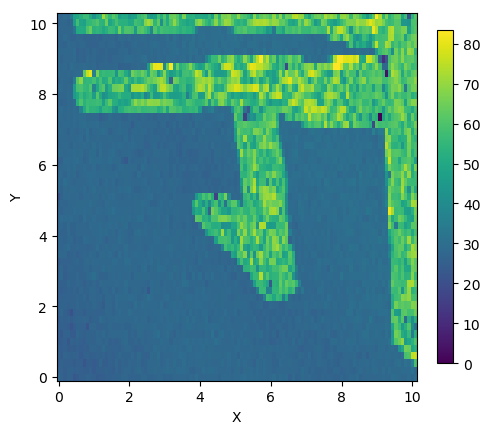

returned values [(128, 128), (128,), (128,)] SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  128                                                  NAXIS2  =                  128                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

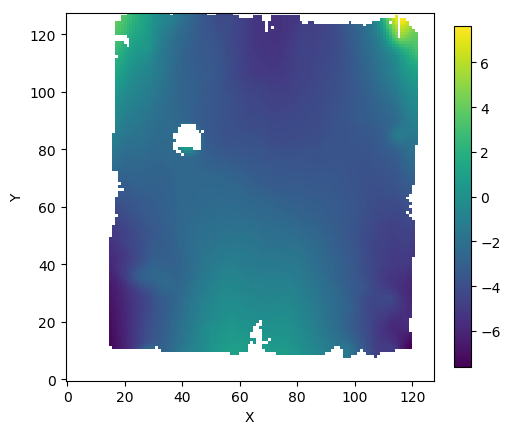

In [139]:
plt.clf()
df=r'input_data\profilometer\04_test_directions\08_xysurf_mm_Intensity.sur'
test_reader(df,read_sur,outfolder=os.path.join(outfolder,'test_read_sur');
display(plt.gcf())

plt.clf()
df=r'input_data\fits\180206_C1S06_GentexCut_Meas1.fits'
test_reader(df,read_fits,outfolder=os.path.join(outfolder,'test_read_fits');
display(plt.gcf())



In [140]:
def read_csv_points(wfile,*args,**kwargs):
    """Read a processed points file in format x,y,z as csv output of analysis routines."""
    w0=get_points(wfile,*args,**kwargs)
    w=w0.copy()
    raw=w0
    x,y=points_find_grid(w,'grid')[1]
    pdata=resample_grid(w,matrix=True)
    return (pdata,x,y),raw

[autoreload of format_reader failed: Traceback (most recent call last):
  File "C:\Users\Vincenzo\.conda\envs\py3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Vincenzo\.conda\envs\py3\lib\site-packages\IPython\extensions\autoreload.py", line 368, in superreload
    module = reload(module)
  File "C:\Users\Vincenzo\.conda\envs\py3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\Vincenzo\.conda\envs\py3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 693, in exec_module
  File "<frozen importlib._bootstrap_external>", line 799, in get_code
  File "<frozen importlib._bootstrap_external>", line 759, in source_to_code
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "G:\My Drive\libra

In [ ]:
plt.clf()
df=r'input_data\fits\180206_C1S06_GentexCut_Meas1.fits'
test_reader(df,read_csv_points,outfolder=os.path.join(outfolder,'test_read_fits'));
display(plt.gcf())

In [ ]:
df=os.path.join(testfolder,r'input_data\profilometer\04_test_directions\02_xprof_m_Intensity.sur')
res,header=read_sur(df)


In [ ]:
df=os.path.join(testfolder,r'input_data\profilometer\04_test_directions\02_xprof_m_Intensity.sur')
res,header=read_sur(df)
print("returned values",res[0].shape,header)
#print('test method `xAxis` of returned object')
self.assertEqual(len(res), 3)
plot_data(res[0],res[1],res[2])